In [1]:
%matplotlib inline

import os
import sys
import datacube
import numpy as np
import matplotlib.pyplot as plt
import rasterio
import xarray as xr
from odc.ui import with_ui_cbk
import pandas as pd

sys.path.append("Scripts")
from dea_plotting import display_map
from dea_datahandling import wofs_fuser
from dea_plotting import rgb
from dea_datahandling import load_ard
from dea_bandindices import calculate_indices

In [2]:
dc = datacube.Datacube(app="Fire")

In [3]:
lat = (-35.579,-36.077)
lon = (136.454,138.218)

# defining a similar period of time for the same purpose
time = ("2007-11-28","2007-12-31")

In [4]:
display_map(x=lon,y=lat)

In [5]:
query = {
    'x': lon,
    'y': lat,
    'time': time,
    'measurements': [
        'nbart_blue', 'nbart_green', 'nbart_red', 'nbart_nir', 'nbart_swir_1',
        'nbart_swir_2', 'nbart_panchromatic'
    ],
    'output_crs': 'EPSG:3577',
    'resolution': (-100, 100),
    'group_by': 'solar_day'
}

fires = load_ard(dc=dc, products = ['ga_ls7e_ard_3'], **query)

Loading ga_ls7e_ard_3 data
    Applying pixel quality mask
Combining and sorting data
Masking out invalid values
    Returning 3 observations 


In [7]:
fires["ndvi"]=(fires.nbart_nir-fires.nbart_red)/(fires.nbart_nir+fires.nbart_red)

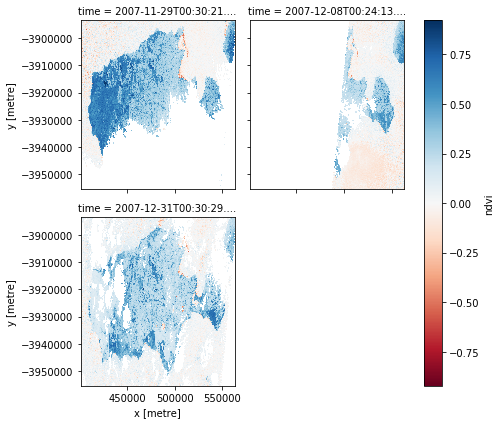

In [8]:
fires.ndvi.plot(cmap="RdBu",col="time",col_wrap=2)